<a href="https://colab.research.google.com/github/CyberWen20/Curso-Atenea/blob/Talleres/TAREA_Taller11_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Taller 11: Aprendizaje Automático***

***Curso Analisis de Datos***

Grupo 02

***Nombre*** Wendy Dayana Perez

***Cedula*** 1000693996

***Punto 1***

In [ ]:
!pip install sodapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [ ]:
!pip install pandas

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [7]:
!pip install numpy

In [ ]:
#Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia - "Prevalencia de Hipertensión Arterial en Personas de 18 a 69 años en el Departamento de Bolívar"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
cliente=Socrata("www.datos.gov.co",None)
result=cliente.get("57zk-a3ru")
hipertension=pd.DataFrame.from_records(result)
hipertension.head()

,municipio,numerador_2016,denominador_2016,resultado_2016,numerador_2017,denominador_2017,resultado_2017,numerador_2018,denominador_2018,resultado_2018
0,Total Bolívar con Cartagena,109466,1249930,8.76,131178,1226722,10.69,132610,1258963,10.53
1,Total Bolívar sin Cartagena,37800,573397,6.59,49976,552636,9.04,50163,568445,8.82
2,Achí,1187,12430,9.55,1833,11409,16.07,1675,11377,14.72
3,Altos del Rosario,254,4855,5.23,348,4735,7.35,432,4899,8.82
4,Arenal,84,4087,2.06,111,3857,2.88,84,3967,2.12


In [ ]:
#información General del Dataset
hipertension.describe()

,municipio,numerador_2016,denominador_2016,resultado_2016,numerador_2017,denominador_2017,resultado_2017,numerador_2018,denominador_2018,resultado_2018
count,48,48,48,48,48,48,48,48,48,48
unique,48,47,48,47,48,47,48,48,47,47
top,Total Bolívar con Cartagena,314,1249930,8.99,131178,4068,10.69,132610,4899,8.82
freq,1,2,1,2,1,2,1,1,2,2


In [ ]:
#mostrar los primeros 15 resgistros del DataFrame
hipertension.head(15)

,municipio,numerador_2016,denominador_2016,resultado_2016,numerador_2017,denominador_2017,resultado_2017,numerador_2018,denominador_2018,resultado_2018
0,Total Bolívar con Cartagena,109466,1249930,8.76,131178,1226722,10.69,132610,1258963,10.53
1,Total Bolívar sin Cartagena,37800,573397,6.59,49976,552636,9.04,50163,568445,8.82
2,Achí,1187,12430,9.55,1833,11409,16.07,1675,11377,14.72
3,Altos del Rosario,254,4855,5.23,348,4735,7.35,432,4899,8.82
4,Arenal,84,4087,2.06,111,3857,2.88,84,3967,2.12
5,Arjona,2181,35111,6.21,2881,35089,8.21,2943,35785,8.22
6,Arroyohondo,195,4427,4.40,203,4581,4.43,366,4899,7.47
7,Barranco de Loba,314,7677,4.09,470,7483,6.28,507,7813,6.49
8,Calamar,951,13150,7.23,965,12899,7.48,996,13241,7.52
9,Cantagallo,83,4479,1.85,47,3866,1.22,16,4234,0.38


NameError: ignored

In [18]:
# Se transforman los datos de salida de la clasificación en un arreglo de numpy
salida= hipertension['resultado_2016']
salidas = pd.to_numeric(hipertension['resultado_2016'],errors='coerce')
y=np.array(salida)
print(y)

NameError: ignored

In [1]:
#Realice las tareas de limpieza necesarias
hipertension = hipertension.df.drop('denominador_2017')
hipertension = hipertension.df.drop('denominador_2016')

NameError: ignored

In [17]:
#Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset
X= hipertension.loc['municipio']
y= hipertension2.loc['resultados_2016', 'resultados_2017', 'resultados_2018']

NameError: ignored

In [9]:
#Aplicar el algoritmo de clasificación de los K vecinos más cercanos
!pip install scikit-learn

In [10]:
import numpy as np
from matplotlib import pyplot as pyplot

**Conclusión**

Se observa que el dataset no tomo los datos de entrenamiento y de prueba, mas sin embargo coloco las librerias y codigo necesario para que se realize el Aprendizaje automatico. loS k vecinos permiten calcular las distancia existente entre los neuvos datos y los existentes para detenerminar el grupo que esta de acuerdo a los lineamientos.

***Punto 2***

Para este punto del taller realice cargue de un dataset csv desde google, para poder analizar de mejor manera los datos

In [ ]:
!pip install pandas

In [ ]:
from google.colab import files

In [ ]:
load=files.upload()

Saving Numbers_and_Rates_of_Suicide_Fatalities_in_NS_by_Year__Sex__and_Zone_of_Residence.csv to Numbers_and_Rates_of_Suicide_Fatalities_in_NS_by_Year__Sex__and_Zone_of_Residence.csv


In [ ]:
Suicidios_df= pd.read_csv('/content/Numbers_and_Rates_of_Suicide_Fatalities_in_NS_by_Year__Sex__and_Zone_of_Residence.csv', delimiter=",")

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#Infomación General del Dataset
Suicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 15 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Year of death                                                                     279 non-null    int64  
 1   Month of death                                                                    174 non-null    object 
 2   Year/month                                                                        174 non-null    object 
 3   Zone                                                                              279 non-null    object 
 4   Sex                                                                               279 non-null    object 
 5   Frequency                                                                         279 non-null    int64  
 6   Ra

In [ ]:
#
Suicidios_df.head(10)

,Year of death,Month of death,Zone,Sex,Frequency,"Rate per 100,000 population",Frequency of fall/Jump,Frequency of gunshot wound,Frequency of hanging/suffocation,Frequency of other/undetermined,Frequency of sharp force
0,2008,NaN,Central,Total,46,11.2,NaN,NaN,NaN,NaN,NaN
1,2008,NaN,Eastern,Total,16,9.4,NaN,NaN,NaN,NaN,NaN
2,2008,NaN,Northern,Total,15,9.8,NaN,NaN,NaN,NaN,NaN
3,2008,NaN,Western,Total,16,7.9,NaN,NaN,NaN,NaN,NaN
4,2008,NaN,Nova Scotia,Total,94,10.0,NaN,NaN,NaN,NaN,NaN
5,2008,NaN,Nova Scotia,Male,76,16.7,NaN,NaN,NaN,NaN,NaN
6,2008,NaN,Nova Scotia,Female,18,3.8,NaN,NaN,NaN,NaN,NaN
7,2009,NaN,Central,Total,52,12.5,NaN,NaN,NaN,NaN,NaN
8,2009,NaN,Eastern,Total,30,17.8,NaN,NaN,NaN,NaN,NaN
9,2009,NaN,Northern,Total,24,15.7,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cantidad de Filas y Columnas
Suicidios_df.shape

(279, 15)

In [ ]:
#Descipción de la bd
Suicidios_df.describe

<bound method NDFrame.describe of      Year of death Month of death        Zone     Sex  Frequency  \
0             2008            NaN      Central  Total         46   
1             2008            NaN      Eastern  Total         16   
2             2008            NaN     Northern  Total         15   
3             2008            NaN      Western  Total         16   
4             2008            NaN  Nova Scotia  Total         94   
..             ...            ...          ...    ...        ...   
274           2023            Feb  Nova Scotia  Total         14   
275           2023            Mar  Nova Scotia  Total         16   
276           2023            Apr  Nova Scotia  Total         14   
277           2023            May  Nova Scotia  Total          5   
278           2023            Jun  Nova Scotia  Total          8   

     Rate per 100,000 population  Frequency of fall/Jump  \
0                           11.2                     NaN   
1                            

In [ ]:
Suicidios_df ['Sex'].describe()

count       279
unique        3
top       Total
freq        249
Name: Sex, dtype: object

In [ ]:
Suicidios_df ['Frequency'].describe()

count    279.000000
mean      27.118280
std       32.382555
min        4.000000
25%       10.000000
50%       14.000000
75%       27.000000
max      155.000000
Name: Frequency, dtype: float64

In [ ]:
#Tareas de limpieza
del(Suicidios_df['Frequency of suicide excluding drug toxicity suicide deaths (i.e. drug overdose)'])
del(Suicidios_df['Frequency of drowning'])
del(Suicidios_df['Frequency of drug toxicity or gas or chemical asphyxia'])
del(Suicidios_df['Year/month'])

In [ ]:
#Reemplazar datos, esto lo hice con el motivo de realizar un analisis mas profundo del dataset
Suicidios_df.replace({"NaN": 5})

,Year of death,Month of death,Zone,Sex,Frequency,"Rate per 100,000 population",Frequency of fall/Jump,Frequency of gunshot wound,Frequency of hanging/suffocation,Frequency of other/undetermined,Frequency of sharp force
0,2008,NaN,Central,Total,46,11.2,NaN,NaN,NaN,NaN,NaN
1,2008,NaN,Eastern,Total,16,9.4,NaN,NaN,NaN,NaN,NaN
2,2008,NaN,Northern,Total,15,9.8,NaN,NaN,NaN,NaN,NaN
3,2008,NaN,Western,Total,16,7.9,NaN,NaN,NaN,NaN,NaN
4,2008,NaN,Nova Scotia,Total,94,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
274,2023,Feb,Nova Scotia,Total,14,NaN,NaN,NaN,NaN,NaN,NaN
275,2023,Mar,Nova Scotia,Total,16,NaN,NaN,NaN,NaN,NaN,NaN
276,2023,Apr,Nova Scotia,Total,14,NaN,NaN,NaN,NaN,NaN,NaN
277,2023,May,Nova Scotia,Total,5,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#información del Dataset despues de la limpieza
Suicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year of death                     279 non-null    int64  
 1   Month of death                    174 non-null    object 
 2   Zone                              279 non-null    object 
 3   Sex                               279 non-null    object 
 4   Frequency                         279 non-null    int64  
 5   Rate per 100,000 population       105 non-null    float64
 6   Frequency of fall/Jump            14 non-null     float64
 7   Frequency of gunshot wound        14 non-null     float64
 8   Frequency of hanging/suffocation  14 non-null     float64
 9   Frequency of other/undetermined   14 non-null     float64
 10  Frequency of sharp force          14 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 24.1+ KB


<Axes: >

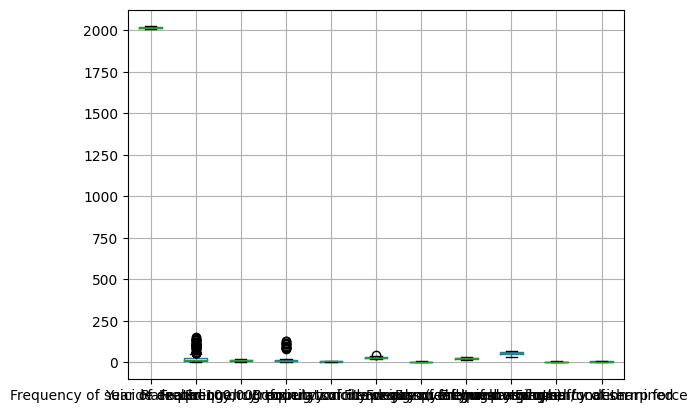

In [ ]:
#Represención gráfica general
Suicidios_df.boxplot()

In [ ]:
# Se transforman los datos de salida de la clasificación en un arreglo de numpy
salida=Suicidios_df['Rate per 100,000 population']
salidas = pd.to_numeric(Suicidios_df['Rate per 100,000 population'],errors='coerce')
y=np.array(salida)
print(y)

[11.2  9.4  9.8  7.9 10.  16.7  3.8 12.5 17.8 15.7 11.4 14.2 21.8  6.9
 10.   8.9  6.5 17.3 10.9 19.1  3.1 11.8 16.8 10.5  9.9 12.1 18.8  5.6
 13.2 15.1 10.5 14.  13.4 19.4  7.5 10.1 13.4 13.2 14.1 12.2 19.1  5.6
 13.1 10.4 12.  10.6 12.  18.1  6.3 13.5 16.1 10.8 15.2 14.4 23.4  5.8
 11.7 16.1 14.1 17.2 14.2 21.7  7.1 13.6 15.6 14.8 15.6 14.5 22.4  7.
 13.7 11.2 12.8 18.6 14.6 22.8  6.7 12.1 14.2 12.8 16.6 14.1 22.5  6.1
 10.4 14.3 13.4 13.5 12.3 20.2  4.8 11.8 15.  17.3 18.9 14.8 22.4  7.5
 13.3 16.3 18.7 17.9 15.6 23.5  8.1  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  

In [ ]:
#Aplicar el algoritmo de agrupamiento de las K medias
pd.options.display.max_columns = None
import pandas as pd
import numpy as np
Suicidios_df = pd.read.csv('Rate per 100,000 population')

NameError: ignored

In [26]:
#Calcular los puntajes de la agrupación
Suicidios_df.drop(['Rate per 100,000 population'],1).hist()
plt.show()

NameError: ignored

In [ ]:
#Representar gráficamente los grupos
Suicidios_df.drop(['Rate per 100,000 population'],1).hist()
plt.show()

***Concluir si la agrupación fue buena o no***

**Conclusión:**

La divisiòn de la cantidad de los datos en grupos que se hubiera podido generar, calcularia la distancia del neuvo dato en el centroide (punto medio)en el grupo existente para que se liberen los datos y se obtengan unos nuevos.